In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

print("Libraries loaded successfully!")

Libraries loaded successfully!


## 1. Load the Data

In [2]:
# Load all datasets
fighter_attributes = pd.read_csv('data/fighter_attributes.csv')
fighter_history = pd.read_csv('data/fighter_history.csv')
fighter_stats = pd.read_csv('data/fighter_stats.csv')
ufc_events = pd.read_csv('data/ufc-events.csv')

print(f"Fighter Attributes: {fighter_attributes.shape[0]:,} rows, {fighter_attributes.shape[1]} columns")
print(f"Fighter History: {fighter_history.shape[0]:,} rows, {fighter_history.shape[1]} columns")
print(f"Fighter Stats: {fighter_stats.shape[0]:,} rows, {fighter_stats.shape[1]} columns")
print(f"UFC Events: {ufc_events.shape[0]:,} rows, {ufc_events.shape[1]} columns")

Fighter Attributes: 3,035 rows, 13 columns
Fighter History: 17,837 rows, 16 columns
Fighter Stats: 34,586 rows, 57 columns
UFC Events: 8,925 rows, 39 columns


## 2. Fighter Attributes Analysis

In [3]:
# Preview fighter attributes
print("Fighter Attributes Sample:")
fighter_attributes.head(10)

Fighter Attributes Sample:


,fighter_id,name,height,weight,age,dob,gender,weight_class,reach,stance,style,gym,country
0,3332412,Islam Makhachev,177.80,70.31,33.0,1991-10-27,male,welterweight,179.07,southpaw,wrestling,eagles mma,russia
1,4350762,Zhang Weili,162.56,52.16,36.0,1989-08-13,female,womens-flyweight,160.02,switch,muay thai,beijing black tiger,china
2,4294832,Carlos Prates,185.42,77.11,32.0,1993-08-17,male,welterweight,198.12,switch,striker,fighting nerds,brazil
3,4243624,Tracy Cortez,165.10,56.70,31.0,1993-12-10,female,womens-flyweight,166.37,orthodox,mixed martial artist,fight ready,usa
4,4690541,Gregory Rodrigues,190.50,83.91,33.0,1992-02-17,male,middleweight,190.50,orthodox,grappling,kill cliff fc,brazil
5,4426250,Rodolfo Vieira,182.88,83.91,36.0,1989-09-25,male,middleweight,185.42,orthodox,brazilian jiu-jitsu,fighting nerds,brazil
6,2478987,Eric McConico,182.88,92.53,35.0,1990-05-09,male,middleweight,195.58,southpaw,NaN,mma lab,usa
7,5028019,Fatima Kline,167.64,52.16,25.0,2000-07-12,female,womens-strawweight,171.45,orthodox,NaN,silver fox bjj,usa
8,2553261,Gerald Meerschaert,185.42,83.91,37.0,1987-12-18,male,middleweight,195.58,southpaw,brazilian jiu-jitsu,kill cliff fc,usa
9,4916251,Jacqueline Cavalcanti,172.72,60.78,28.0,1997-08-29,female,womens-bantamweight,177.80,orthodox,striker,syndicate mma,portugal


In [4]:
# Data types and missing values
print("\nData Types:")
print(fighter_attributes.dtypes)
print("\n" + "="*50)
print("\nMissing Values:")
print(fighter_attributes.isnull().sum())


Data Types:
fighter_id        int64
name             object
height          float64
weight          float64
age             float64
dob              object
gender           object
weight_class     object
reach           float64
stance           object
style            object
gym              object
country          object
dtype: object


Missing Values:
fighter_id         0
name               0
height           251
weight           229
age              332
dob              332
gender             0
weight_class     158
reach            572
stance           132
style           1534
gym              729
country          644
dtype: int64


In [5]:
# Statistical summary of numerical columns
fighter_attributes.describe()

,fighter_id,height,weight,age,reach
count,3.035000e+03,2784.000000,2806.000000,2703.000000,2463.000000
mean,3.502266e+06,178.161293,75.564038,36.991121,182.223703
std,1.007045e+06,9.076822,16.442633,6.944045,10.837877
min,2.220951e+06,152.400000,47.630000,19.000000,147.320000
25%,2.512062e+06,172.720000,61.690000,32.000000,175.260000
50%,3.096577e+06,177.800000,70.310000,36.000000,182.880000
75%,4.389172e+06,185.420000,83.910000,41.500000,190.500000
max,5.310572e+06,210.820000,140.610000,71.000000,214.630000


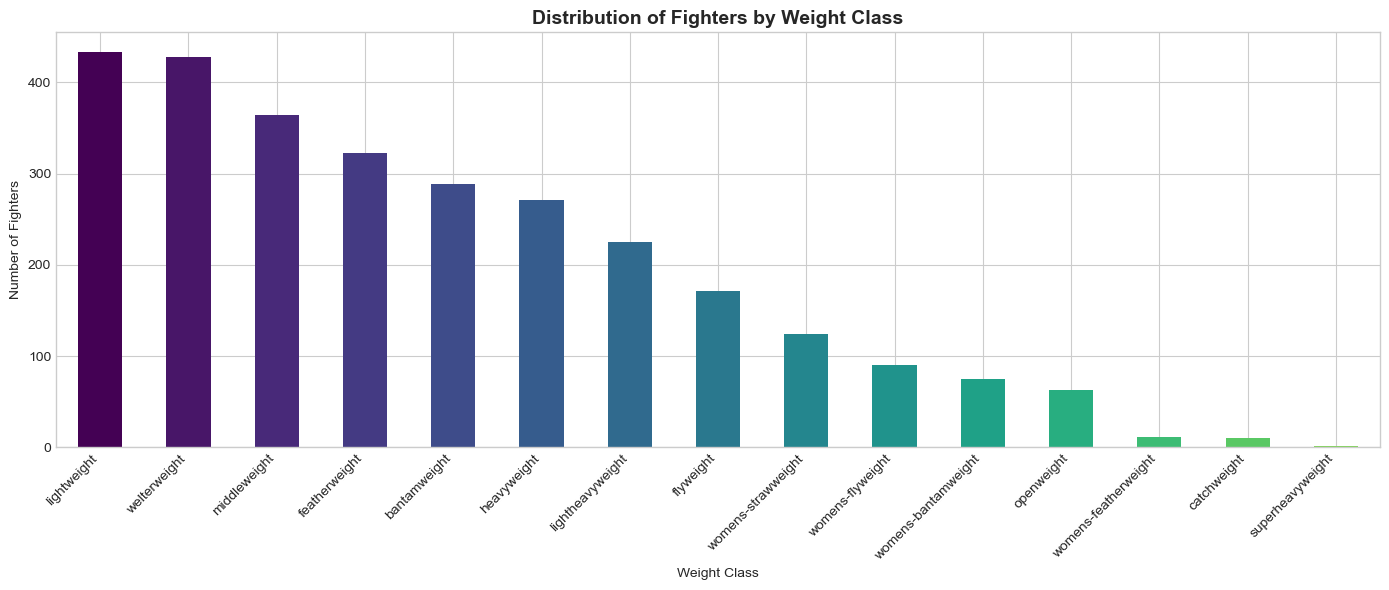

In [6]:
# Distribution of fighters by weight class
plt.figure(figsize=(14, 6))
weight_class_counts = fighter_attributes['weight_class'].value_counts()
colors = plt.cm.viridis(np.linspace(0, 0.8, len(weight_class_counts)))
weight_class_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Fighters by Weight Class', fontsize=14, fontweight='bold')
plt.xlabel('Weight Class')
plt.ylabel('Number of Fighters')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

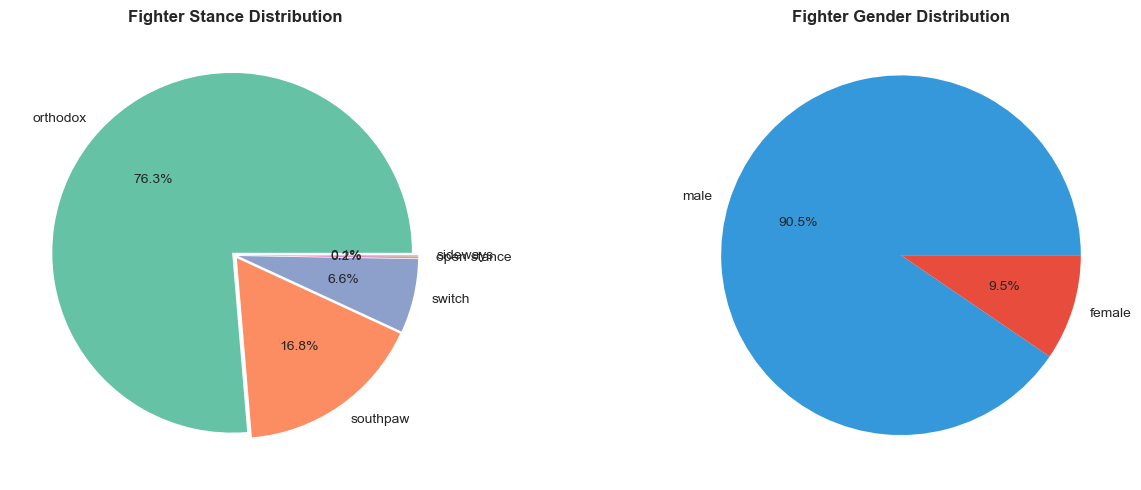

In [7]:
# Distribution of fighters by stance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Stance distribution
stance_counts = fighter_attributes['stance'].value_counts()
axes[0].pie(stance_counts.values, labels=stance_counts.index, autopct='%1.1f%%', 
            colors=plt.cm.Set2.colors, explode=[0.02]*len(stance_counts))
axes[0].set_title('Fighter Stance Distribution', fontsize=12, fontweight='bold')

# Gender distribution
gender_counts = fighter_attributes['gender'].value_counts()
axes[1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
            colors=['#3498db', '#e74c3c'])
axes[1].set_title('Fighter Gender Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

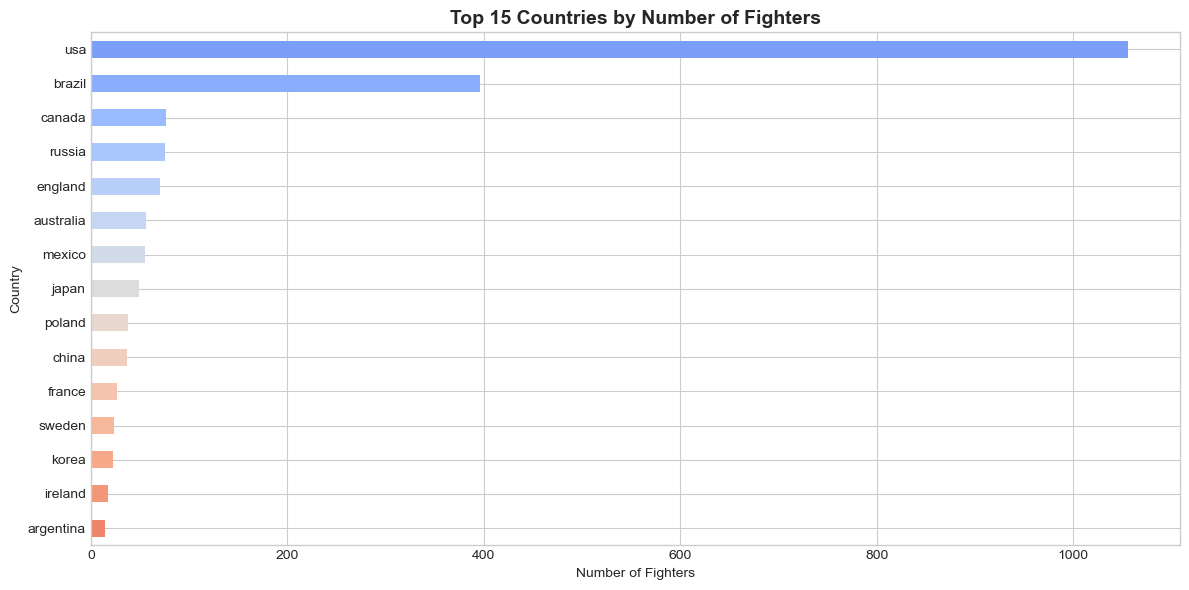

In [8]:
# Top 15 countries by number of fighters
plt.figure(figsize=(12, 6))
country_counts = fighter_attributes['country'].value_counts().head(15)
colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(country_counts)))
country_counts.plot(kind='barh', color=colors)
plt.title('Top 15 Countries by Number of Fighters', fontsize=14, fontweight='bold')
plt.xlabel('Number of Fighters')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

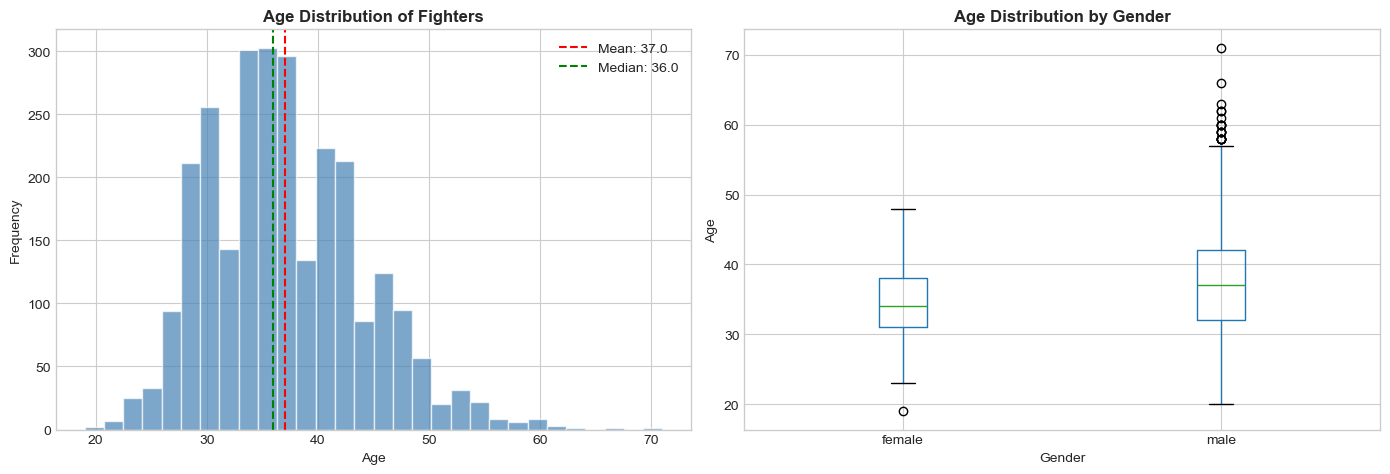

In [9]:
# Age distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(fighter_attributes['age'].dropna(), bins=30, color='steelblue', edgecolor='white', alpha=0.7)
axes[0].axvline(fighter_attributes['age'].mean(), color='red', linestyle='--', label=f'Mean: {fighter_attributes["age"].mean():.1f}')
axes[0].axvline(fighter_attributes['age'].median(), color='green', linestyle='--', label=f'Median: {fighter_attributes["age"].median():.1f}')
axes[0].set_title('Age Distribution of Fighters', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Box plot by gender
fighter_attributes.boxplot(column='age', by='gender', ax=axes[1])
axes[1].set_title('Age Distribution by Gender', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Age')
plt.suptitle('')

plt.tight_layout()
plt.show()

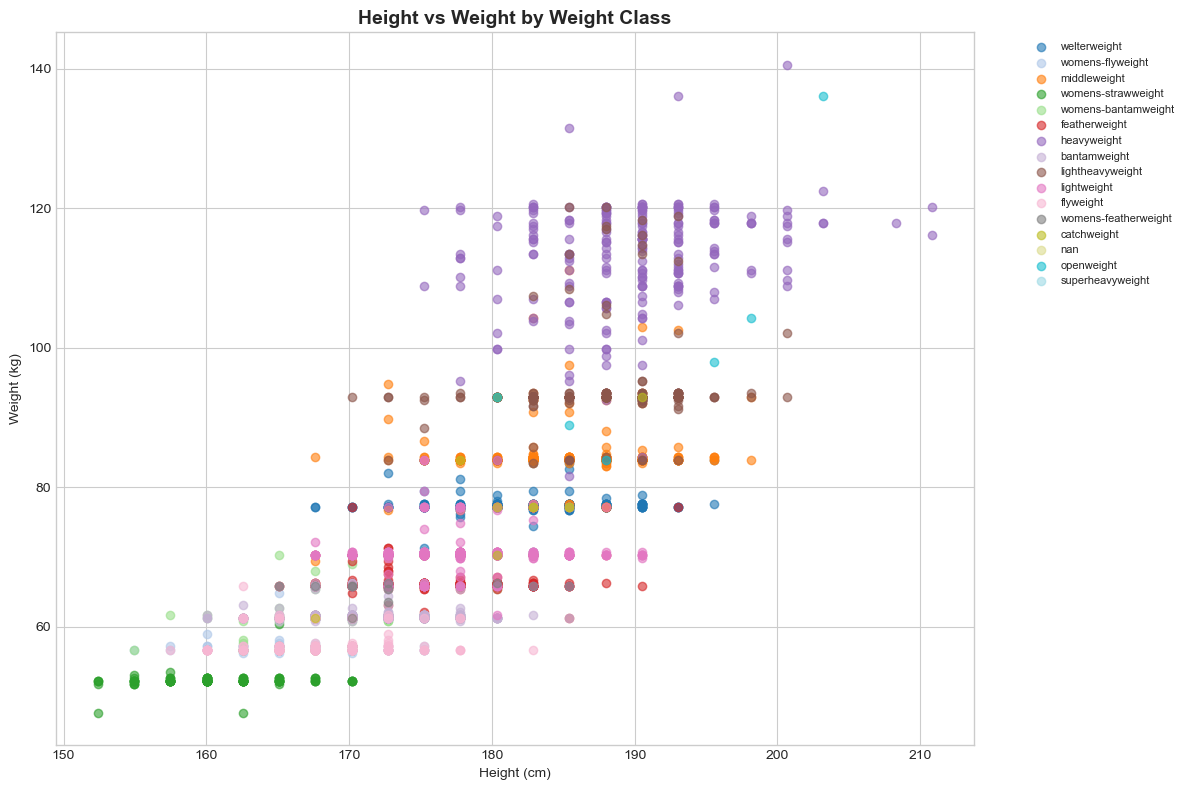

In [10]:
# Height vs Weight scatter plot by weight class
plt.figure(figsize=(12, 8))
weight_classes = fighter_attributes['weight_class'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(weight_classes)))

for wc, color in zip(weight_classes, colors):
    subset = fighter_attributes[fighter_attributes['weight_class'] == wc]
    plt.scatter(subset['height'], subset['weight'], label=wc, alpha=0.6, c=[color])

plt.title('Height vs Weight by Weight Class', fontsize=14, fontweight='bold')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

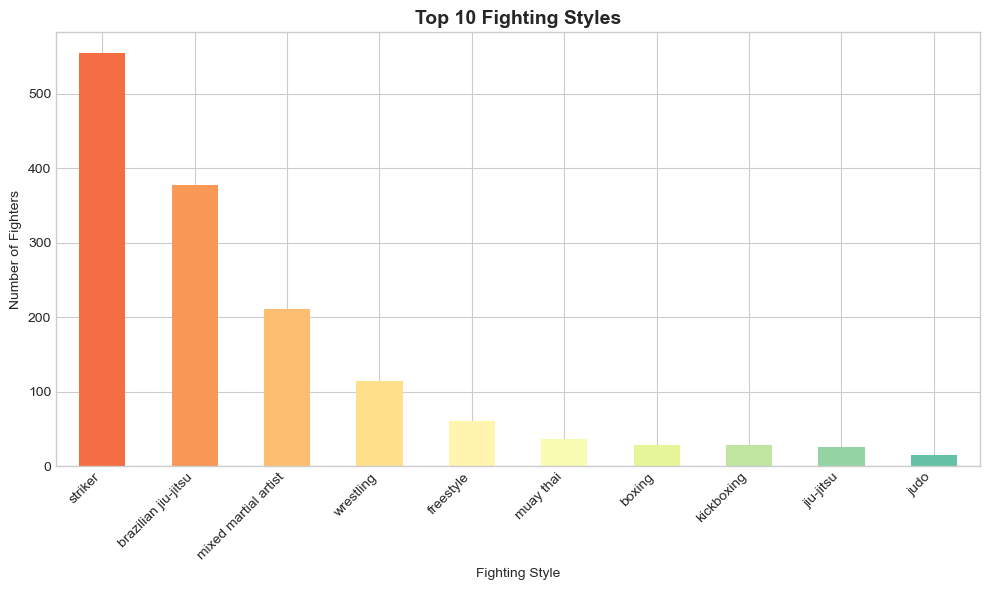

In [11]:
# Top fighting styles
style_counts = fighter_attributes['style'].value_counts().head(10)
plt.figure(figsize=(10, 6))
style_counts.plot(kind='bar', color=plt.cm.Spectral(np.linspace(0.2, 0.8, len(style_counts))))
plt.title('Top 10 Fighting Styles', fontsize=14, fontweight='bold')
plt.xlabel('Fighting Style')
plt.ylabel('Number of Fighters')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3. Fighter History Analysis

In [12]:
# Preview fighter history
print("Fighter History Sample:")
fighter_history.head(10)

Fighter History Sample:


,uid,fight_id,event_id,event_date,event_name,promotion,fighter_id,fighter_name,fight_result,opponent_id,opponent_name,title_fight,fight_end_round,fight_result_type,fight_duration,over_2_5
0,s:3301~l:3321~e:600051442~c:401751541,600051442-4873640-3028863,600051442,2025-01-18,UFC 311,UFC,3332412,islam makhachev,W,3028863,renato moicano,True,1,SUBMISSION,4.08,False
1,s:3301~l:3321~e:600044413~c:401652641,600044413-4873640-2506549,600044413,2024-06-01,UFC 302,UFC,3332412,islam makhachev,W,2506549,dustin poirier,True,5,SUBMISSION,22.70,True
2,s:3301~l:3321~e:600031832~c:401534648,600031832-3949584-4873640,600031832,2023-10-21,UFC 294,UFC,3332412,islam makhachev,W,3949584,alexander volkanovski,True,1,KO-TKO,3.10,False
3,s:3301~l:3321~e:600025531~c:401498612,600025531-3949584-4873640,600025531,2023-02-11,UFC 284,UFC,3332412,islam makhachev,W,3949584,alexander volkanovski,True,5,DEC-UNA,25.00,True
4,s:3301~l:3321~e:600017767~c:401423650,600017767-4873640-2504169,600017767,2022-10-22,UFC 280,UFC,3332412,islam makhachev,W,2504169,charles oliveira,True,2,SUBMISSION,8.27,False
5,s:3301~l:3321~e:600014327~c:401396271,600014327-4873640-2502364,600014327,2022-02-26,UFC Fight Night,UFC,3332412,islam makhachev,W,2502364,king green,False,1,KO-TKO,3.38,False
6,s:3301~l:3321~e:600009660~c:401379570,600009660-4873640-3109135,600009660,2021-10-30,UFC 267,UFC,3332412,islam makhachev,W,3109135,dan hooker,False,1,SUBMISSION,2.42,False
7,s:3301~l:3321~e:600006953~c:401334701,600006953-3955778-4873640,600006953,2021-07-17,UFC Fight Night,UFC,3332412,islam makhachev,W,3955778,thiago moises,False,4,SUBMISSION,17.63,True
8,s:3301~l:3321~e:600001860~c:401289255,600001860-4873640-2951202,600001860,2021-03-06,UFC 259,UFC,3332412,islam makhachev,W,2951202,drew dober,False,3,SUBMISSION,11.62,False
9,s:3301~l:3321~e:401129626~c:267839,401129626-4873640-3114625,401129626,2019-09-07,UFC 242,UFC,3332412,islam makhachev,W,3114625,davi ramos,False,3,DEC-UNA,15.00,True


In [13]:
# Convert event_date to datetime
fighter_history['event_date'] = pd.to_datetime(fighter_history['event_date'])

# Basic statistics
print(f"Total fights recorded: {len(fighter_history):,}")
print(f"Unique fighters: {fighter_history['fighter_id'].nunique():,}")
print(f"Date range: {fighter_history['event_date'].min()} to {fighter_history['event_date'].max()}")

Total fights recorded: 17,837
Unique fighters: 3,015
Date range: 1993-11-13 00:00:00 to 2025-09-27 00:00:00


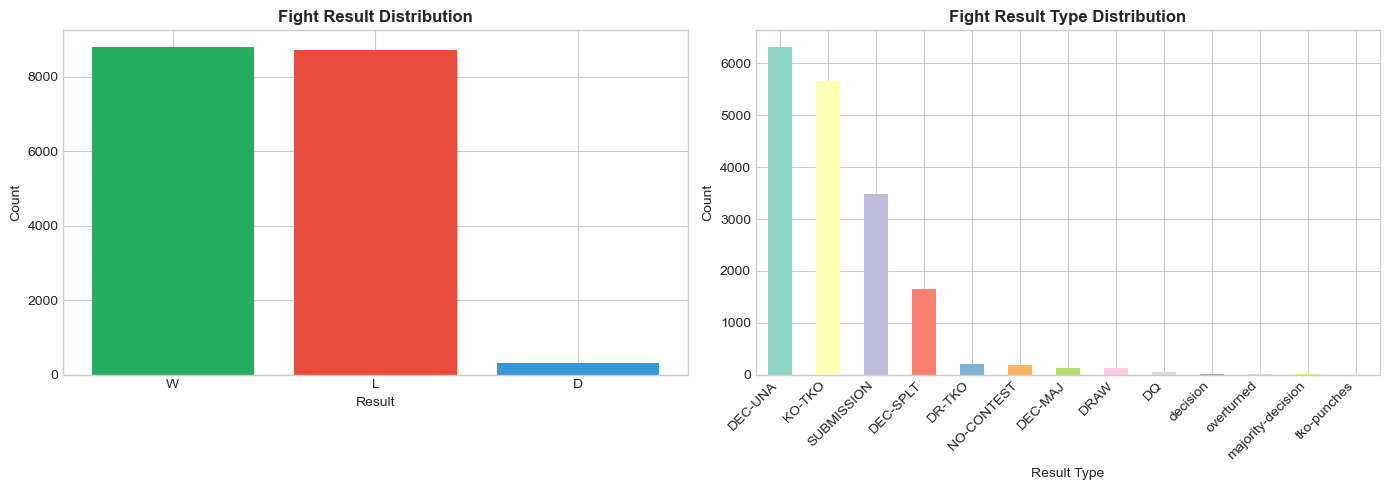

In [14]:
# Fight result distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Win/Loss distribution
result_counts = fighter_history['fight_result'].value_counts()
colors = {'W': '#27ae60', 'L': '#e74c3c', 'D': '#3498db', 'NC': '#95a5a6'}
result_colors = [colors.get(r, '#333') for r in result_counts.index]
axes[0].bar(result_counts.index, result_counts.values, color=result_colors)
axes[0].set_title('Fight Result Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Result')
axes[0].set_ylabel('Count')

# Fight result type distribution
result_type_counts = fighter_history['fight_result_type'].value_counts()
result_type_counts.plot(kind='bar', ax=axes[1], color=plt.cm.Set3.colors)
axes[1].set_title('Fight Result Type Distribution', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Result Type')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

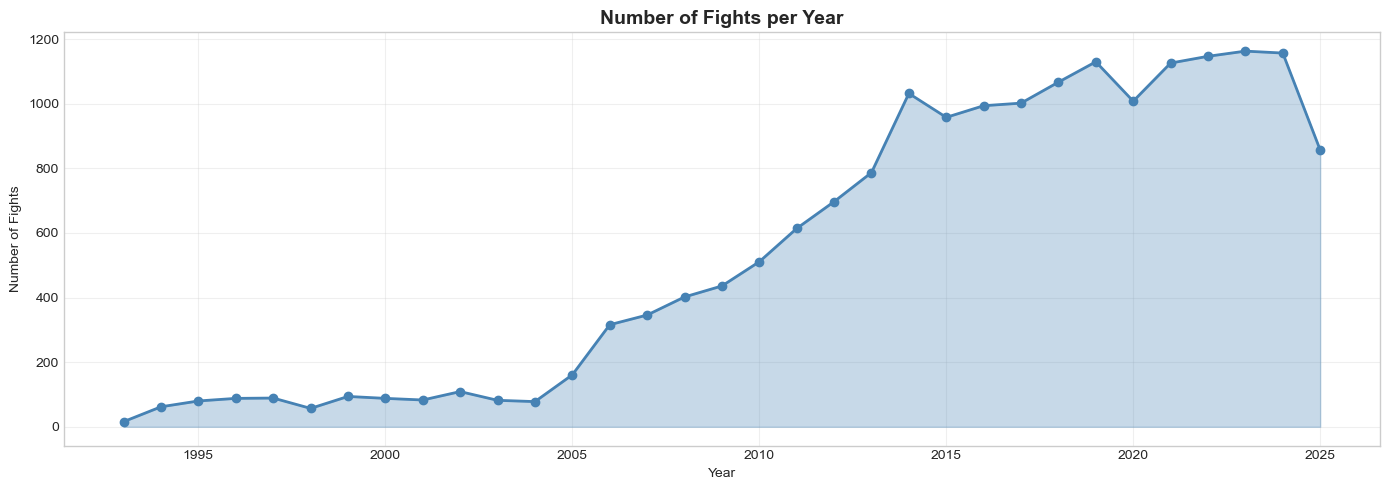

In [15]:
# Fights per year
fighter_history['year'] = fighter_history['event_date'].dt.year
fights_per_year = fighter_history.groupby('year').size()

plt.figure(figsize=(14, 5))
plt.fill_between(fights_per_year.index, fights_per_year.values, alpha=0.3, color='steelblue')
plt.plot(fights_per_year.index, fights_per_year.values, 'o-', color='steelblue', linewidth=2, markersize=6)
plt.title('Number of Fights per Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Fights')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [16]:
# Title fights analysis
title_fights = fighter_history[fighter_history['title_fight'] == True]
print(f"Total title fights: {len(title_fights):,}")
print(f"\nTitle fights by result type:")
print(title_fights['fight_result_type'].value_counts())

Total title fights: 959

Title fights by result type:
fight_result_type
KO-TKO        343
DEC-UNA       288
SUBMISSION    214
DEC-SPLT       68
DR-TKO         16
DRAW           16
DEC-MAJ         8
DQ              2
NO-CONTEST      2
Name: count, dtype: int64


In [17]:
# Fighter win/loss records
fighter_records = fighter_history.groupby('fighter_id').agg({
    'fight_result': lambda x: (x == 'W').sum(),
    'fighter_name': 'first'
}).rename(columns={'fight_result': 'wins'})

losses = fighter_history.groupby('fighter_id').apply(lambda x: (x['fight_result'] == 'L').sum())
fighter_records['losses'] = losses
fighter_records['total_fights'] = fighter_records['wins'] + fighter_records['losses']
fighter_records['win_rate'] = fighter_records['wins'] / fighter_records['total_fights']

# Top 15 fighters by wins
top_winners = fighter_records.nlargest(15, 'wins')
print("Top 15 Fighters by Wins:")
top_winners[['fighter_name', 'wins', 'losses', 'win_rate']]

Top 15 Fighters by Wins:


C:\Users\maxsj\AppData\Local\Temp\ipykernel_22000\1366395639.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  losses = fighter_history.groupby('fighter_id').apply(lambda x: (x['fight_result'] == 'L').sum())


,fighter_name,wins,losses,win_rate
fighter_id,,,,
2335718,jim miller,27,18,0.600000
3001914,neil magny,24,13,0.648649
2354269,andrei arlovski,23,18,0.560976
2479918,donald cerrone,23,14,0.621622
2504169,charles oliveira,23,11,0.676471
2614933,max holloway,23,8,0.741935
2335639,jon jones,22,1,0.956522
2335778,demian maia,22,11,0.666667
2506549,dustin poirier,22,9,0.709677


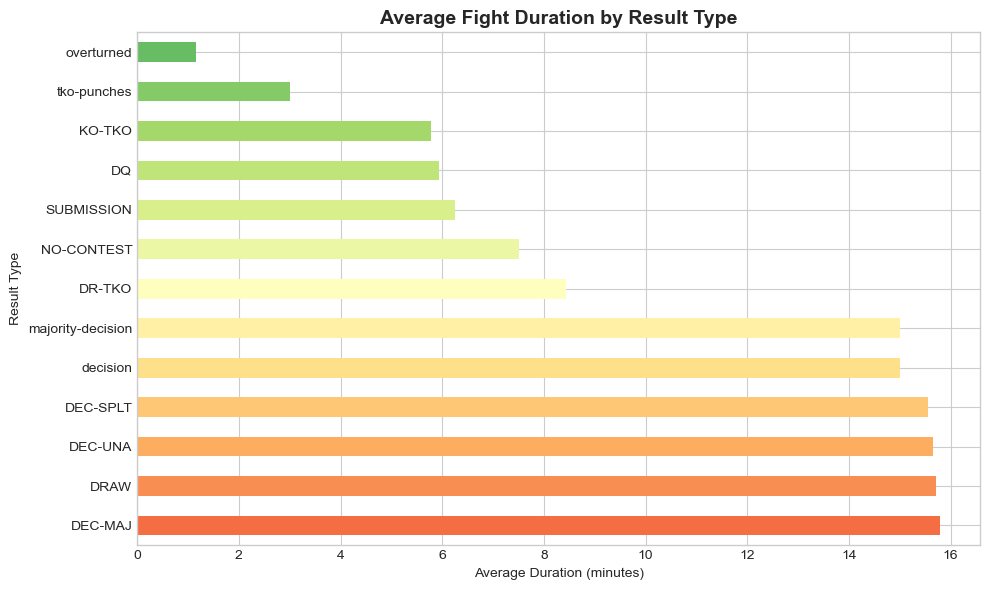

In [18]:
# Average fight duration by result type
avg_duration = fighter_history.groupby('fight_result_type')['fight_duration'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_duration.plot(kind='barh', color=plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(avg_duration))))
plt.title('Average Fight Duration by Result Type', fontsize=14, fontweight='bold')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Result Type')
plt.tight_layout()
plt.show()

## 4. Fighter Statistics Analysis

In [19]:
# Preview fighter stats
print("Fighter Stats Sample:")
print(f"Columns: {list(fighter_stats.columns)}")
fighter_stats.head()

Fighter Stats Sample:
Columns: ['uid', 'fighter_id', 'SDBL', 'SDBA', 'SDB_ACC', 'SDHL', 'SDHA', 'SDH_ACC', 'SDLL', 'SDLA', 'SDL_ACC', 'TSL', 'TSA', 'TS_ACC', 'SSL', 'SSA', 'SS_ACC', 'KD', 'SCBL', 'SCBA', 'SCB_ACC', 'SCHL', 'SCHA', 'SCH_ACC', 'SCLL', 'SCLA', 'SCL_ACC', 'RV', 'SR', 'TDA', 'TDL', 'TDS', 'TD_ACC', 'SGBL', 'SGBA', 'SGB_ACC', 'SGHL', 'SGHA', 'SGH_ACC', 'SGLL', 'SGLA', 'SGL_ACC', 'AD', 'ADTB', 'ADHG', 'ADTM', 'ADTS', 'SM', 'TSLL', 'TSLA', 'SL_ACC', 'TSBL', 'TSBA', 'SB_ACC', 'TSHL', 'TSHA', 'SH_ACC']


,uid,fighter_id,SDBL,SDBA,SDB_ACC,SDHL,SDHA,SDH_ACC,SDLL,SDLA,SDL_ACC,TSL,TSA,TS_ACC,SSL,SSA,SS_ACC,KD,SCBL,SCBA,SCB_ACC,SCHL,SCHA,SCH_ACC,SCLL,SCLA,SCL_ACC,RV,SR,TDA,TDL,TDS,TD_ACC,SGBL,SGBA,SGB_ACC,SGHL,SGHA,SGH_ACC,SGLL,SGLA,SGL_ACC,AD,ADTB,ADHG,ADTM,ADTS,SM,TSLL,TSLA,SL_ACC,TSBL,TSBA,SB_ACC,TSHL,TSHA,SH_ACC
0,s:3301~l:3321~e:600051442~c:401751541,3332412,1,2,0.50,4,16,0.25,0,0,0.0,18,31,0.58,6,19,0.32,0,0,0,0.0,0,0,0.00,0,0,0.0,0,0.0,2,1,0,0.50,0,0,0.0,1,1,1.0,0,0,0.0,0,0,0,0,0,1,0,0,0.0,1,2,0.50,5,17,0.29
1,s:3301~l:3321~e:600044413~c:401652641,3332412,3,3,1.00,68,132,0.52,0,1,0.0,147,222,0.66,88,156,0.56,0,4,4,1.0,7,10,0.70,0,0,0.0,0,0.0,16,5,0,0.31,0,0,0.0,6,6,1.0,0,0,0.0,0,0,0,0,0,2,0,1,0.0,7,7,1.00,81,148,0.55
2,s:3301~l:3321~e:600031832~c:401534648,3332412,2,4,0.50,3,5,0.60,2,2,1.0,39,46,0.85,24,29,0.83,1,7,7,1.0,1,2,0.50,0,0,0.0,0,0.0,1,0,0,0.00,0,0,0.0,9,9,1.0,0,0,0.0,0,0,0,0,0,0,2,2,1.0,9,11,0.82,13,16,0.81
3,s:3301~l:3321~e:600025531~c:401498612,3332412,9,11,0.82,33,68,0.49,3,3,1.0,95,135,0.70,57,95,0.60,0,9,9,1.0,3,4,0.75,0,0,0.0,0,0.0,9,4,0,0.44,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,3,3,1.0,18,20,0.90,36,72,0.50
4,s:3301~l:3321~e:600017767~c:401423650,3332412,0,1,0.00,21,30,0.70,0,0,0.0,72,86,0.84,30,41,0.73,1,5,5,1.0,0,0,0.00,0,0,0.0,0,0.0,3,2,0,0.67,0,0,0.0,4,5,0.8,0,0,0.0,0,0,0,0,0,1,0,0,0.0,5,6,0.83,25,35,0.71


In [20]:
# Key statistics explanation
print("Key Statistics Columns:")
print("-" * 50)
print("TSL/TSA: Total Strikes Landed/Attempted")
print("TS_ACC: Total Strike Accuracy")
print("SSL/SSA: Significant Strikes Landed/Attempted")
print("SS_ACC: Significant Strike Accuracy")
print("KD: Knockdowns")
print("TDL/TDA: Takedowns Landed/Attempted")
print("TD_ACC: Takedown Accuracy")
print("SDHL/SDHA: Strikes to Head Landed/Attempted")
print("SDBL/SDBA: Strikes to Body Landed/Attempted")
print("SDLL/SDLA: Strikes to Leg Landed/Attempted")

Key Statistics Columns:
--------------------------------------------------
TSL/TSA: Total Strikes Landed/Attempted
TS_ACC: Total Strike Accuracy
SSL/SSA: Significant Strikes Landed/Attempted
SS_ACC: Significant Strike Accuracy
KD: Knockdowns
TDL/TDA: Takedowns Landed/Attempted
TD_ACC: Takedown Accuracy
SDHL/SDHA: Strikes to Head Landed/Attempted
SDBL/SDBA: Strikes to Body Landed/Attempted
SDLL/SDLA: Strikes to Leg Landed/Attempted


In [21]:
# Aggregate stats per fighter
fighter_agg_stats = fighter_stats.groupby('fighter_id').agg({
    'TSL': 'sum',
    'TSA': 'sum',
    'SSL': 'sum',
    'SSA': 'sum',
    'KD': 'sum',
    'TDL': 'sum',
    'TDA': 'sum'
})

# Calculate accuracy metrics
fighter_agg_stats['total_strike_acc'] = (fighter_agg_stats['TSL'] / fighter_agg_stats['TSA']).fillna(0)
fighter_agg_stats['sig_strike_acc'] = (fighter_agg_stats['SSL'] / fighter_agg_stats['SSA']).fillna(0)
fighter_agg_stats['takedown_acc'] = (fighter_agg_stats['TDL'] / fighter_agg_stats['TDA']).fillna(0)

# Merge with fighter names
fighter_agg_stats = fighter_agg_stats.merge(
    fighter_attributes[['fighter_id', 'name', 'weight_class']], 
    on='fighter_id', 
    how='left'
)

fighter_agg_stats.head(10)

,fighter_id,TSL,TSA,SSL,SSA,KD,TDL,TDA,total_strike_acc,sig_strike_acc,takedown_acc,name,weight_class
0,2220951,398,757,363,721,3,1,3,0.525760,0.503467,0.333333,Greg Hardy,heavyweight
1,2223033,199,342,108,212,1,4,14,0.581871,0.509434,0.285714,Austen Lane,heavyweight
2,2312150,416,940,310,791,1,3,21,0.442553,0.391909,0.142857,Mohammed Usman,heavyweight
3,2335243,1723,3316,969,2496,6,9,22,0.519602,0.388221,0.409091,Carlos Condit,welterweight
4,2335256,97,157,27,83,0,6,15,0.617834,0.325301,0.400000,Carmelo Marrero,NaN
5,2335298,456,553,213,296,2,15,28,0.824593,0.719595,0.535714,Brock Lesnar,heavyweight
6,2335302,383,639,172,412,5,5,6,0.599374,0.417476,0.833333,Heath Herring,heavyweight
7,2335338,1495,2064,779,1315,1,54,106,0.724322,0.592395,0.509434,Randy Couture,lightheavyweight
8,2335447,1248,1915,960,1410,21,6,8,0.651697,0.680851,0.750000,Anderson Silva,middleweight
9,2335448,1080,1832,662,1378,6,10,51,0.589520,0.480406,0.196078,Patrick Cote,welterweight


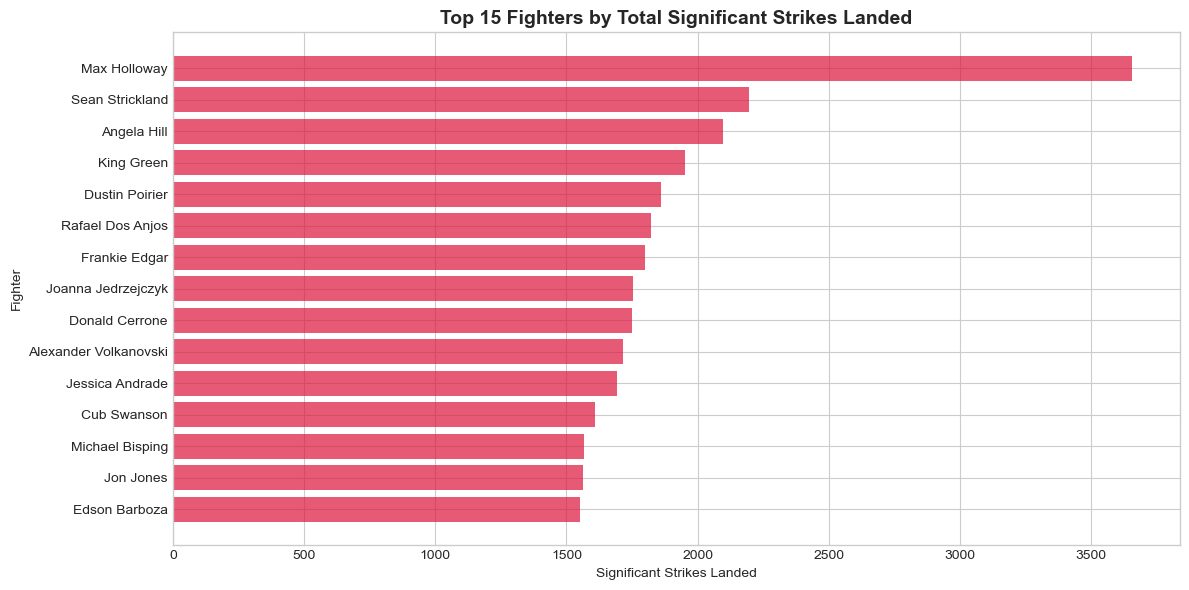

In [22]:
# Top 15 fighters by total significant strikes
top_strikers = fighter_agg_stats.nlargest(15, 'SSL')

plt.figure(figsize=(12, 6))
plt.barh(top_strikers['name'], top_strikers['SSL'], color='crimson', alpha=0.7)
plt.title('Top 15 Fighters by Total Significant Strikes Landed', fontsize=14, fontweight='bold')
plt.xlabel('Significant Strikes Landed')
plt.ylabel('Fighter')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

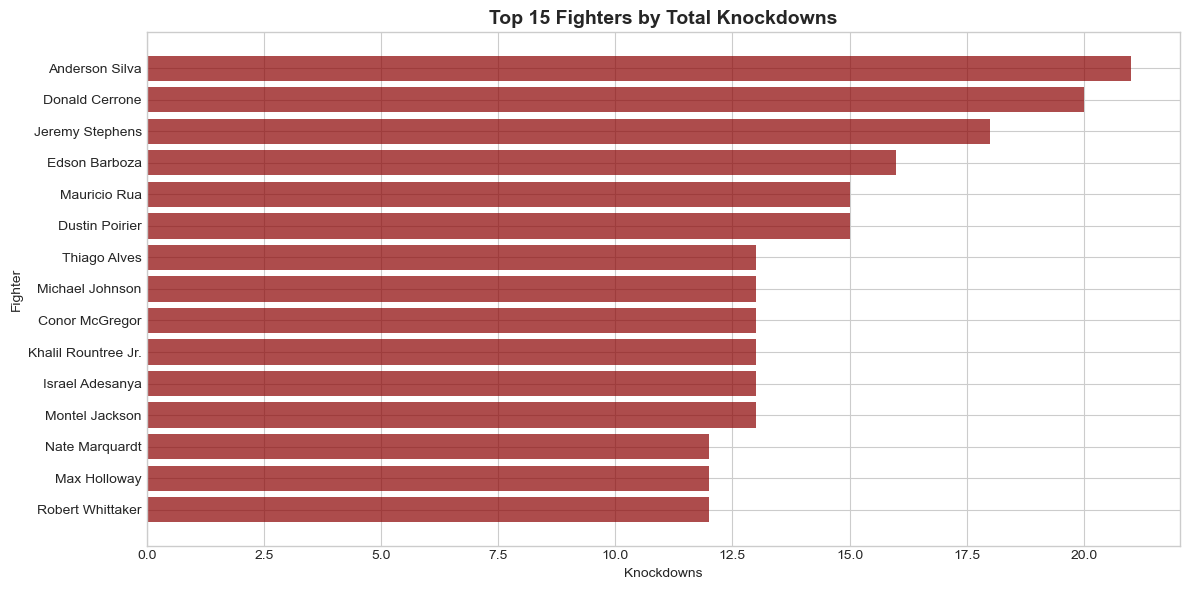

In [23]:
# Top 15 fighters by knockdowns
top_kd = fighter_agg_stats.nlargest(15, 'KD')

plt.figure(figsize=(12, 6))
plt.barh(top_kd['name'], top_kd['KD'], color='darkred', alpha=0.7)
plt.title('Top 15 Fighters by Total Knockdowns', fontsize=14, fontweight='bold')
plt.xlabel('Knockdowns')
plt.ylabel('Fighter')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

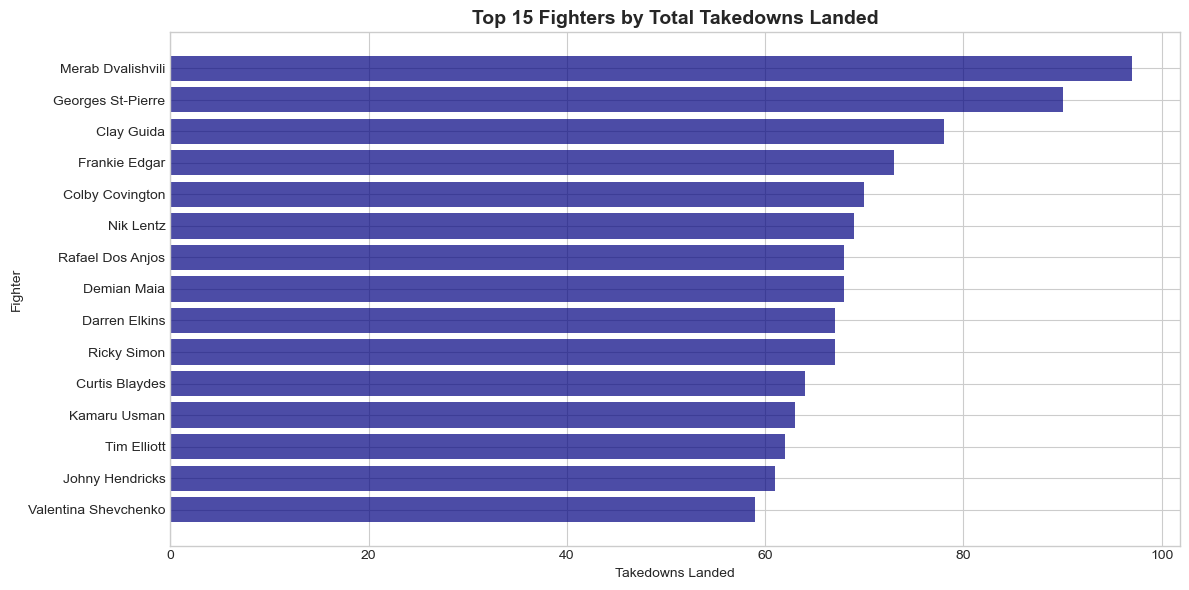

In [24]:
# Top 15 fighters by takedowns
top_td = fighter_agg_stats.nlargest(15, 'TDL')

plt.figure(figsize=(12, 6))
plt.barh(top_td['name'], top_td['TDL'], color='navy', alpha=0.7)
plt.title('Top 15 Fighters by Total Takedowns Landed', fontsize=14, fontweight='bold')
plt.xlabel('Takedowns Landed')
plt.ylabel('Fighter')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

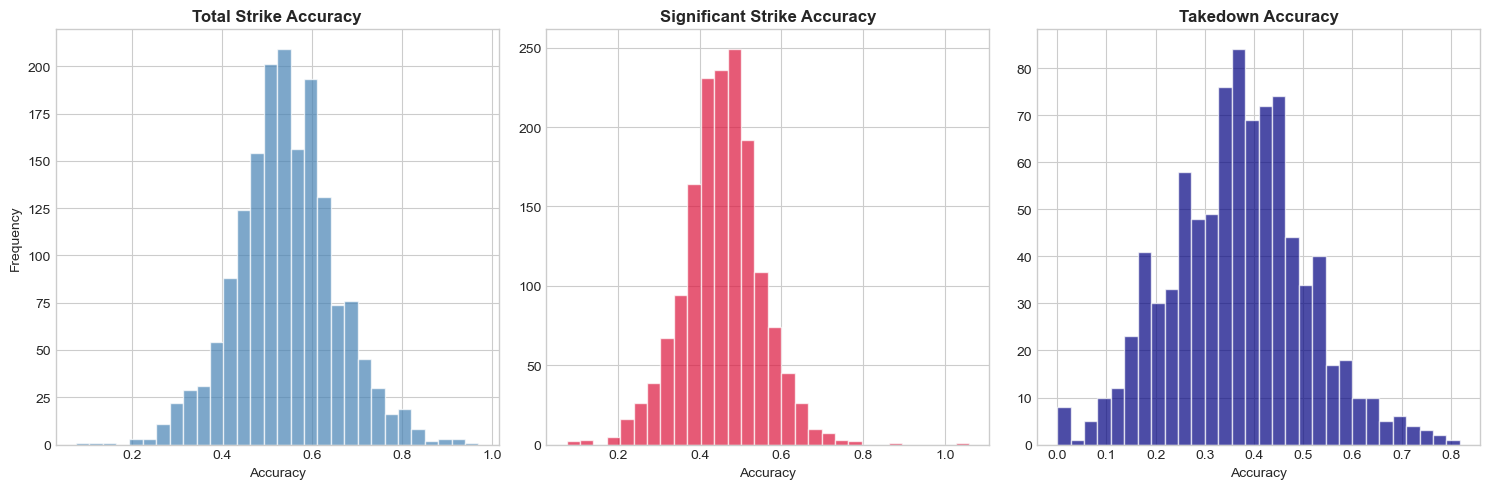

In [25]:
# Strike accuracy distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Filter for fighters with minimum attempts
min_attempts = 50
filtered_stats = fighter_agg_stats[fighter_agg_stats['TSA'] > min_attempts]

axes[0].hist(filtered_stats['total_strike_acc'], bins=30, color='steelblue', edgecolor='white', alpha=0.7)
axes[0].set_title('Total Strike Accuracy', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Accuracy')
axes[0].set_ylabel('Frequency')

filtered_stats2 = fighter_agg_stats[fighter_agg_stats['SSA'] > min_attempts]
axes[1].hist(filtered_stats2['sig_strike_acc'], bins=30, color='crimson', edgecolor='white', alpha=0.7)
axes[1].set_title('Significant Strike Accuracy', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Accuracy')

filtered_stats3 = fighter_agg_stats[fighter_agg_stats['TDA'] > 10]
axes[2].hist(filtered_stats3['takedown_acc'], bins=30, color='navy', edgecolor='white', alpha=0.7)
axes[2].set_title('Takedown Accuracy', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Accuracy')

plt.tight_layout()
plt.show()

## 5. UFC Events Analysis

In [26]:
# Preview UFC events
print("UFC Events Sample:")
ufc_events.head(10)

UFC Events Sample:


,event_id,event_uid,event_name,event_long_name,event_date,card_section,card_position,fight_id,fight_uid,weight_class,title_fight,title,red_corner_id,red_corner_uid,red_corner,blue_corner_id,blue_corner_uid,blue_corner,fight_completed,fight_end_round,fight_end_clock,fight_outcome,fight_winner,event_venue_id,event_venue,event_venue_city,event_venue_state,event_venue_country,referee_id,referee,judge_one_id,judge_one,judge_one_card,judge_two_id,judge_two,judge_two_card,judge_three_id,judge_three,judge_three_card
0,600056266,s:3301~l:3321~e:600056266,UFC Fight Night,UFC Fight Night: Royval vs. Kape,2025-12-13,MAIN_CARD,1,401830372,s:3301~l:3321~e:600056266~c:401830372,FLYWEIGHT,0,NaN,4239928,s:3301~a:4239928,Brandon Royval,4236504,s:3301~a:4236504,Manel Kape,0,0,0.0,NaN,NaN,6176.0,UFC APEX,Las Vegas,NV,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,600056375,s:3301~l:3321~e:600056375,UFC 323,UFC 323: Dvalishvili vs. Yan 2,2025-12-06,MAIN_CARD,1,401831048,s:3301~l:3321~e:600056375~c:401831048,BANTAMWEIGHT,1,BANTAMWEIGHT_TITLE,3948572,s:3301~a:3948572,Merab Dvalishvili,4293517,s:3301~a:4293517,Petr Yan,0,0,0.0,NaN,NaN,5060.0,T-Mobile Arena,Las Vegas,NV,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,600056375,s:3301~l:3321~e:600056375,UFC 323,UFC 323: Dvalishvili vs. Yan 2,2025-12-06,MAIN_CARD,2,401831049,s:3301~l:3321~e:600056375~c:401831049,FLYWEIGHT,1,FLYWEIGHT_TITLE,2560746,s:3301~a:2560746,Alexandre Pantoja,5120301,s:3301~a:5120301,Joshua Van,0,0,0.0,NaN,NaN,5060.0,T-Mobile Arena,Las Vegas,NV,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,600056375,s:3301~l:3321~e:600056375,UFC 323,UFC 323: Dvalishvili vs. Yan 2,2025-12-06,MAIN_CARD,3,401831054,s:3301~l:3321~e:600056375~c:401831054,BANTAMWEIGHT,1,BANTAMWEIGHT_TITLE,3023388,s:3301~a:3023388,Henry Cejudo,5144008,s:3301~a:5144008,Payton Talbott,0,0,0.0,NaN,NaN,5060.0,T-Mobile Arena,Las Vegas,NV,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,600056375,s:3301~l:3321~e:600056375,UFC 323,UFC 323: Dvalishvili vs. Yan 2,2025-12-06,MAIN_CARD,4,401831055,s:3301~l:3321~e:600056375~c:401831055,LIGHT_HEAVYWEIGHT,0,NaN,2506250,s:3301~a:2506250,Jan Blachowicz,5152109,s:3301~a:5152109,Bogdan Guskov,0,0,0.0,NaN,NaN,5060.0,T-Mobile Arena,Las Vegas,NV,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,600056375,s:3301~l:3321~e:600056375,UFC 323,UFC 323: Dvalishvili vs. Yan 2,2025-12-06,MAIN_CARD,5,401831070,s:3301~l:3321~e:600056375~c:401831070,FLYWEIGHT,0,NaN,3027545,s:3301~a:3027545,Brandon Moreno,4917772,s:3301~a:4917772,Tatsuro Taira,0,0,0.0,NaN,NaN,5060.0,T-Mobile Arena,Las Vegas,NV,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,600056375,s:3301~l:3321~e:600056375,UFC 323,UFC 323: Dvalishvili vs. Yan 2,2025-12-06,PRELIMS,6,401831056,s:3301~l:3321~e:600056375~c:401831056,LIGHTWEIGHT,0,NaN,5074130,s:3301~a:5074130,Nazim Sadykhov,4083018,s:3301~a:4083018,Fares Ziam,0,0,0.0,NaN,NaN,5060.0,T-Mobile Arena,Las Vegas,NV,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,600055175,s:3301~l:3321~e:600055175,UFC Fight Night,UFC Fight Night: Tsarukyan vs. Hooker,2025-11-22,PRELIMS,6,401830354,s:3301~l:3321~e:600055175~c:401830354,FLYWEIGHT,0,NaN,3155425,s:3301~a:3155425,Alex Perez,4294926,s:3301~a:4294926,Asu Almabayev,0,0,0.0,NaN,NaN,11560.0,ABHA Arena,Doha,NaN,Qatar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,600055175,s:3301~l:3321~e:600055175,UFC Fight Night,UFC Fight Night: Tsarukyan vs. Hooker,2025-11-22,PRELIMS,12,401830939,s:3301~l:3321~e:600055175~c:401830939,WELTERWEIGHT,0,NaN,3074102,s:3301~a:3074102,Jack Hermansson,5050129,s:3301~a:5050129,Myktybek Orolbai,0,0,0.0,NaN,NaN,11560.0,ABHA Arena,Doha,NaN,Qatar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,600055175,s:3301~l:3321~e:600055175,UFC Fight Night,UFC Fight Night: Tsarukyan vs. Hooker,2025-11-22,PRELIMS,11,401830358,s:3301~l:3321~e:600055175~c:401830358,FLYWEIGHT,0,NaN,4294924,s:3301~a:4294924,Tagir Ulanbekov,2613374,s:3301~a:2613374,Kyoji Horiguchi,0,0,0.0,NaN,NaN,11560.0,ABHA Arena,Doha,NaN,Qatar,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [27]:
# Convert event_date to datetime
ufc_events['event_date'] = pd.to_datetime(ufc_events['event_date'])

# Basic statistics
print(f"Total fights: {len(ufc_events):,}")
print(f"Unique events: {ufc_events['event_id'].nunique():,}")
print(f"Unique venues: {ufc_events['event_venue'].nunique():,}")
print(f"Date range: {ufc_events['event_date'].min()} to {ufc_events['event_date'].max()}")

Total fights: 8,925
Unique events: 859
Unique venues: 229
Date range: 1993-11-12 00:00:00 to 2025-12-13 00:00:00


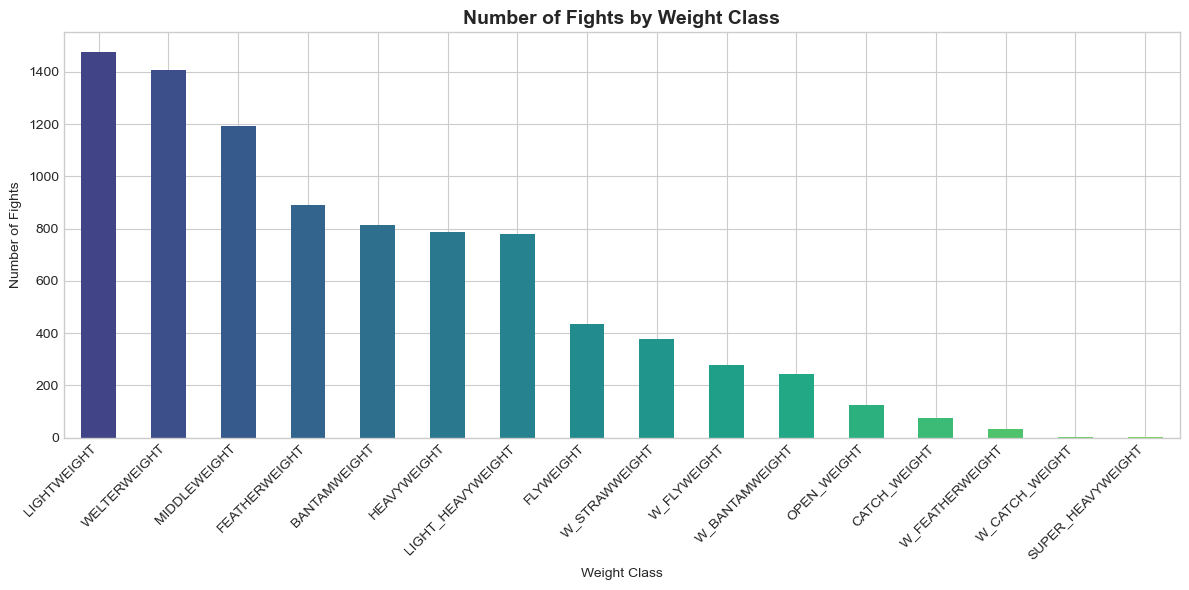

In [28]:
# Fights by weight class
weight_class_fights = ufc_events['weight_class'].value_counts()

plt.figure(figsize=(12, 6))
weight_class_fights.plot(kind='bar', color=plt.cm.viridis(np.linspace(0.2, 0.8, len(weight_class_fights))))
plt.title('Number of Fights by Weight Class', fontsize=14, fontweight='bold')
plt.xlabel('Weight Class')
plt.ylabel('Number of Fights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

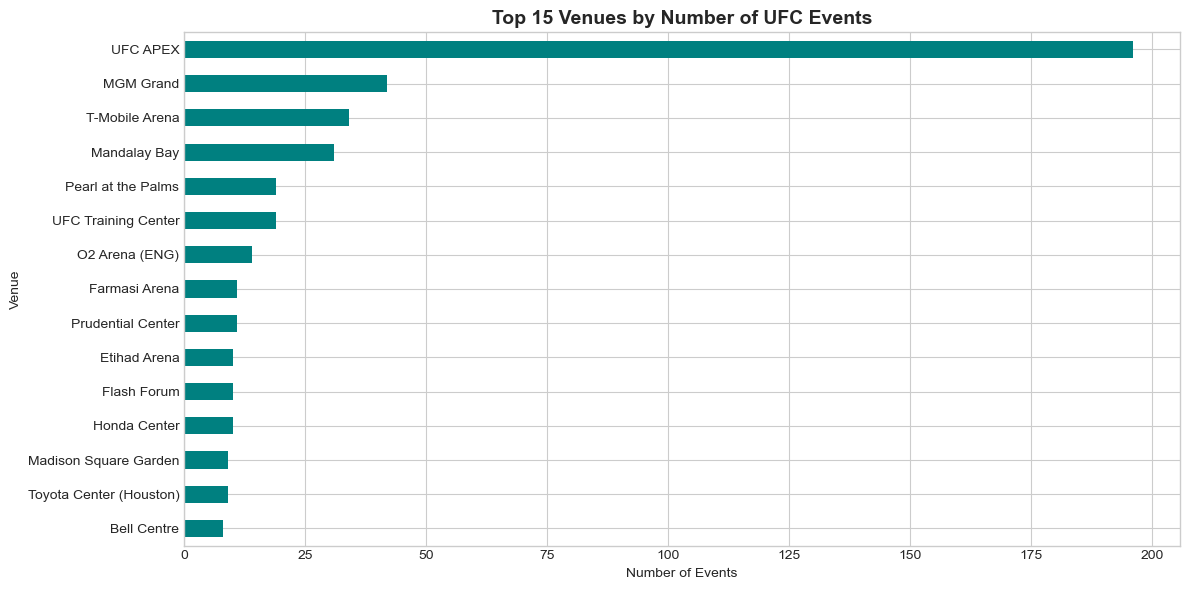

In [29]:
# Top 15 venues by number of events
top_venues = ufc_events.groupby('event_venue')['event_id'].nunique().nlargest(15)

plt.figure(figsize=(12, 6))
top_venues.plot(kind='barh', color='teal')
plt.title('Top 15 Venues by Number of UFC Events', fontsize=14, fontweight='bold')
plt.xlabel('Number of Events')
plt.ylabel('Venue')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

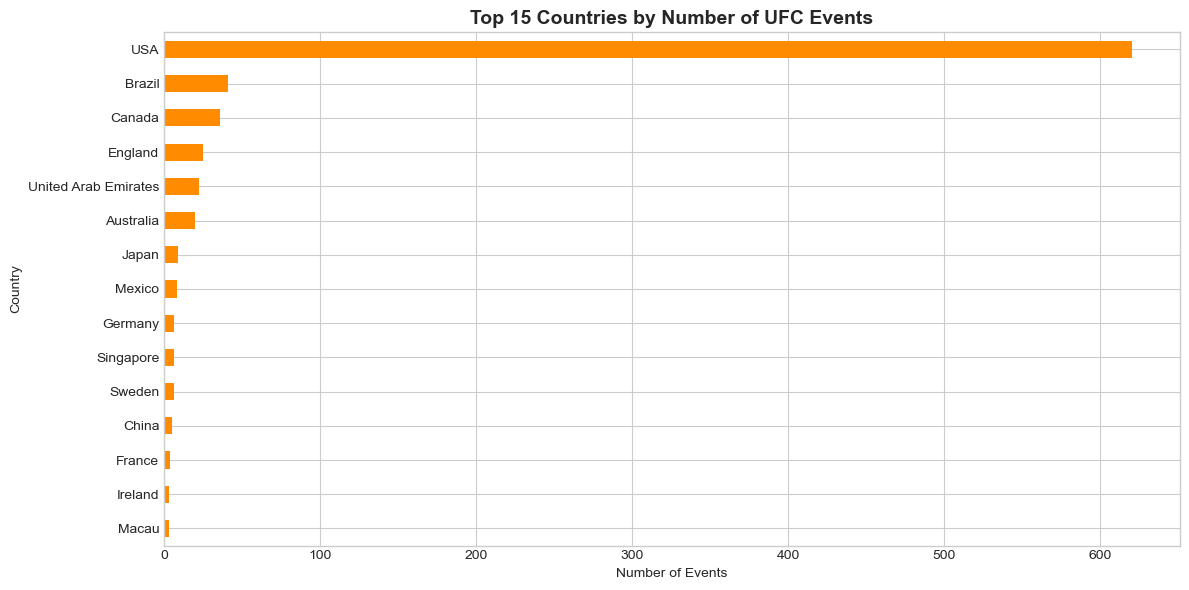

In [30]:
# Events by country
country_events = ufc_events.groupby('event_venue_country')['event_id'].nunique().nlargest(15)

plt.figure(figsize=(12, 6))
country_events.plot(kind='barh', color='darkorange')
plt.title('Top 15 Countries by Number of UFC Events', fontsize=14, fontweight='bold')
plt.xlabel('Number of Events')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

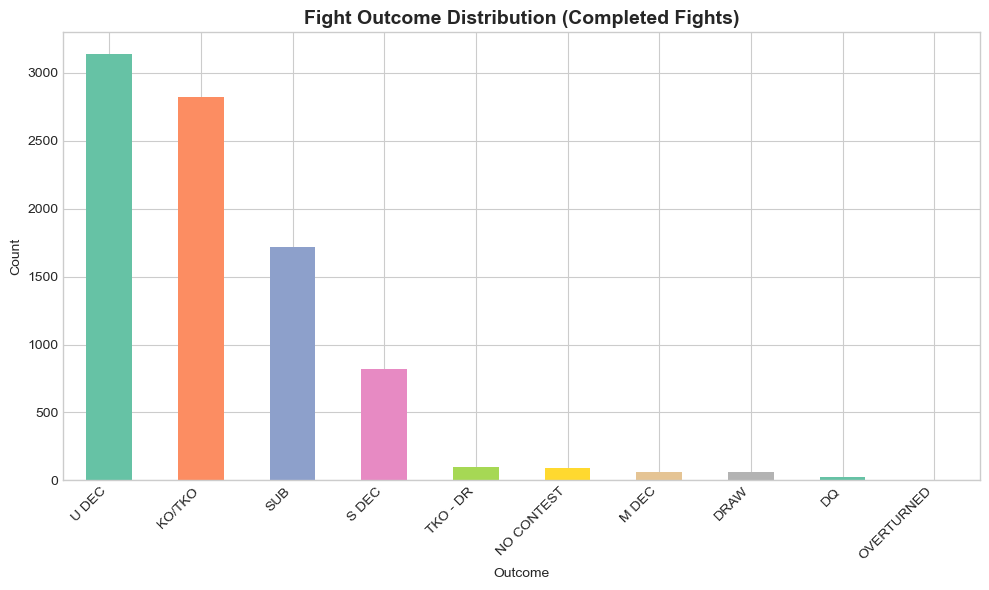

In [31]:
# Fight outcomes distribution (completed fights only)
completed_fights = ufc_events[ufc_events['fight_completed'] == 1]
outcome_counts = completed_fights['fight_outcome'].value_counts()

plt.figure(figsize=(10, 6))
outcome_counts.plot(kind='bar', color=plt.cm.Set2.colors)
plt.title('Fight Outcome Distribution (Completed Fights)', fontsize=14, fontweight='bold')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

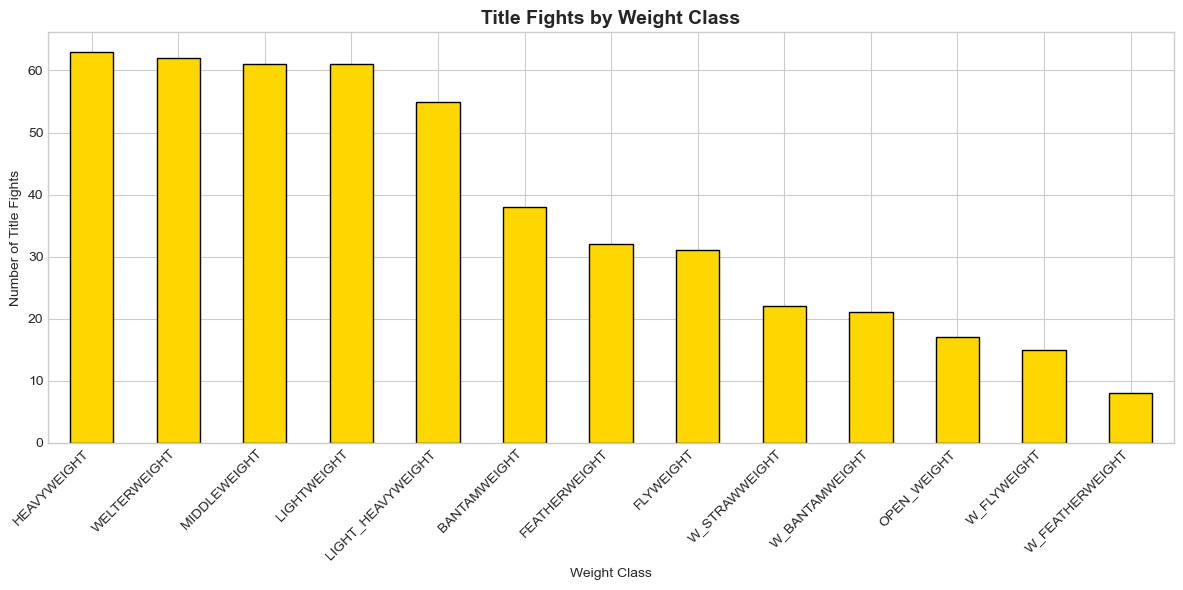

In [32]:
# Title fights by weight class
title_fights_events = ufc_events[ufc_events['title_fight'] == 1]
title_by_class = title_fights_events['weight_class'].value_counts()

plt.figure(figsize=(12, 6))
title_by_class.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Title Fights by Weight Class', fontsize=14, fontweight='bold')
plt.xlabel('Weight Class')
plt.ylabel('Number of Title Fights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 6. Combined Analysis

In [33]:
# Merge fighter attributes with aggregated stats
combined_df = fighter_attributes.merge(fighter_agg_stats.drop(columns=['name', 'weight_class'], errors='ignore'), 
                                       on='fighter_id', how='left')

# Add win/loss records
combined_df = combined_df.merge(fighter_records[['wins', 'losses', 'total_fights', 'win_rate']], 
                                left_on='fighter_id', right_index=True, how='left')

combined_df.head()

,fighter_id,name,height,weight,age,dob,gender,weight_class,reach,stance,style,gym,country,TSL,TSA,SSL,SSA,KD,TDL,TDA,total_strike_acc,sig_strike_acc,takedown_acc,wins,losses,total_fights,win_rate
0,3332412,Islam Makhachev,177.80,70.31,33.0,1991-10-27,male,welterweight,179.07,southpaw,wrestling,eagles mma,russia,1022.0,1436.0,455.0,773.0,4.0,37.0,69.0,0.711699,0.588616,0.536232,16.0,1.0,17.0,0.941176
1,4350762,Zhang Weili,162.56,52.16,36.0,1989-08-13,female,womens-flyweight,160.02,switch,muay thai,beijing black tiger,china,1552.0,2421.0,897.0,1665.0,3.0,26.0,57.0,0.641057,0.538739,0.456140,10.0,2.0,12.0,0.833333
2,4294832,Carlos Prates,185.42,77.11,32.0,1993-08-17,male,welterweight,198.12,switch,striker,fighting nerds,brazil,247.0,454.0,244.0,449.0,9.0,1.0,1.0,0.544053,0.543430,1.000000,6.0,1.0,7.0,0.857143
3,4243624,Tracy Cortez,165.10,56.70,31.0,1993-12-10,female,womens-flyweight,166.37,orthodox,mixed martial artist,fight ready,usa,789.0,1354.0,493.0,999.0,0.0,19.0,40.0,0.582718,0.493493,0.475000,7.0,1.0,8.0,0.875000
4,4690541,Gregory Rodrigues,190.50,83.91,33.0,1992-02-17,male,middleweight,190.50,orthodox,grappling,kill cliff fc,brazil,630.0,1177.0,564.0,1093.0,7.0,15.0,39.0,0.535259,0.516011,0.384615,8.0,4.0,12.0,0.666667


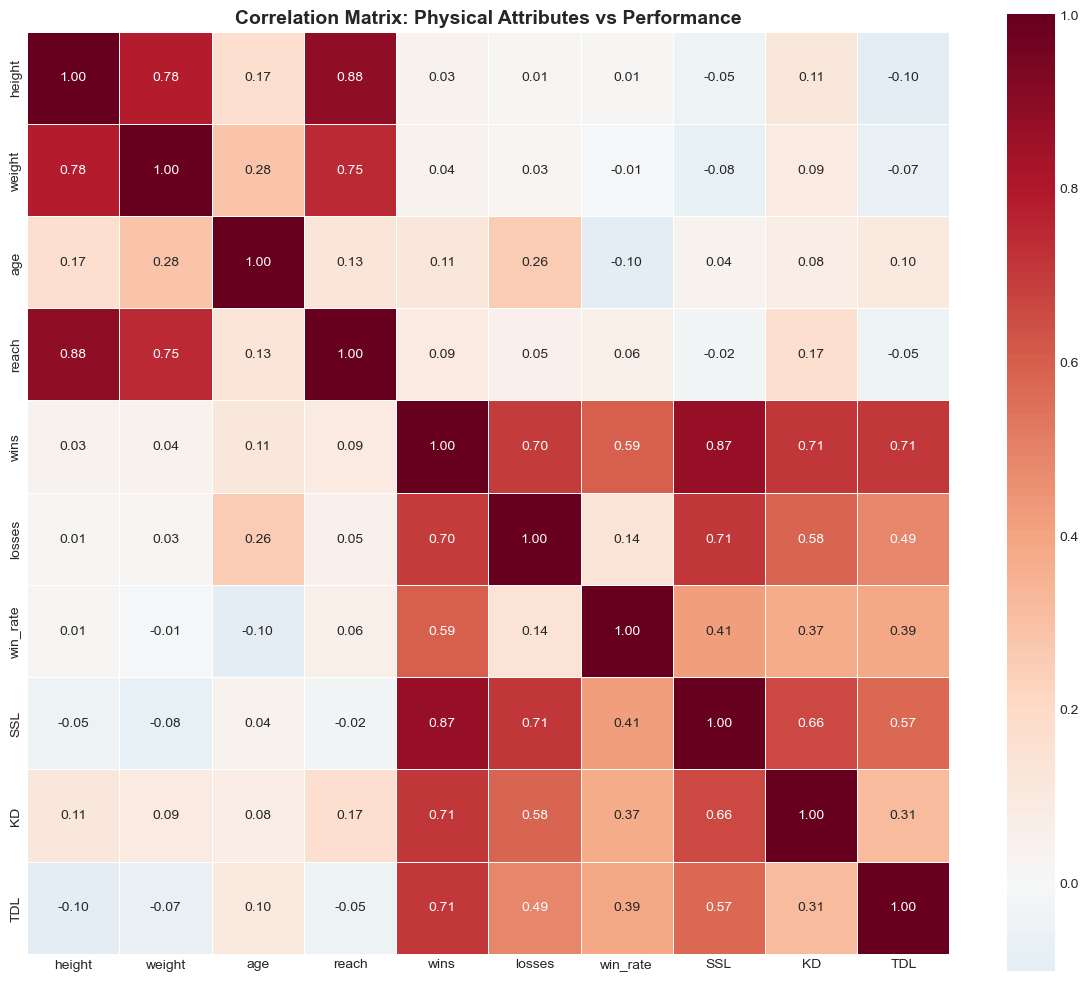

In [34]:
# Correlation between physical attributes and performance
numeric_cols = ['height', 'weight', 'age', 'reach', 'wins', 'losses', 'win_rate', 'SSL', 'KD', 'TDL']
corr_matrix = combined_df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.2f', 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix: Physical Attributes vs Performance', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

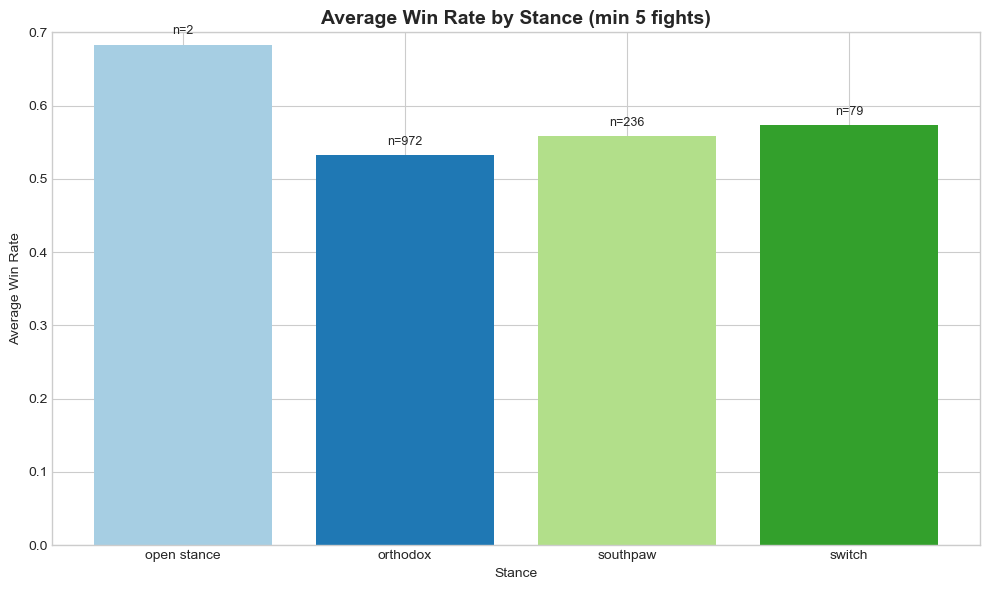

In [36]:
# Win rate by stance (minimum 5 fights)
stance_stats = combined_df[combined_df['total_fights'] >= 5].groupby('stance').agg({
    'win_rate': 'mean',
    'fighter_id': 'count'
}).rename(columns={'fighter_id': 'count'})

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(stance_stats.index, stance_stats['win_rate'], color=plt.cm.Paired.colors)
ax.set_title('Average Win Rate by Stance (min 5 fights)', fontsize=14, fontweight='bold')
ax.set_xlabel('Stance')
ax.set_ylabel('Average Win Rate')
ax.set_ylim(0, 0.7)

# Add count labels
for i, (bar, count) in enumerate(zip(bars, stance_stats['count'])):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
            f'n={count}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

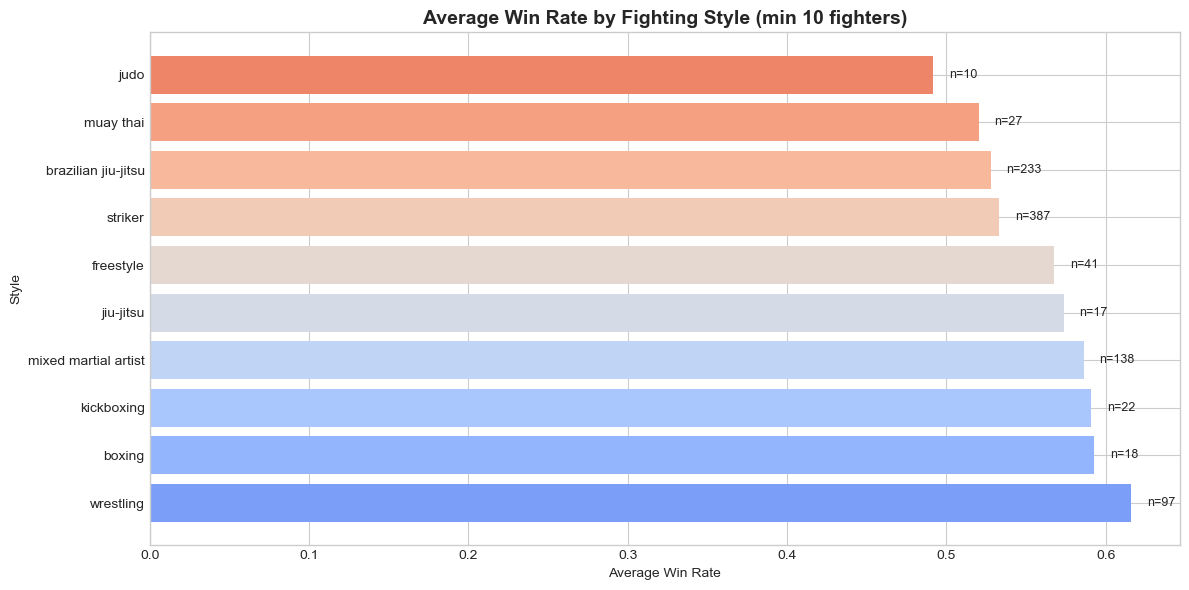

In [37]:
# Win rate by fighting style (minimum 5 fights)
style_stats = combined_df[combined_df['total_fights'] >= 5].groupby('style').agg({
    'win_rate': 'mean',
    'fighter_id': 'count'
}).rename(columns={'fighter_id': 'count'})

style_stats = style_stats[style_stats['count'] >= 10].sort_values('win_rate', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.barh(style_stats.index, style_stats['win_rate'], color=plt.cm.coolwarm(np.linspace(0.2, 0.8, len(style_stats))))
plt.title('Average Win Rate by Fighting Style (min 10 fighters)', fontsize=14, fontweight='bold')
plt.xlabel('Average Win Rate')
plt.ylabel('Style')

# Add count labels
for bar, count in zip(bars, style_stats['count']):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'n={count}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

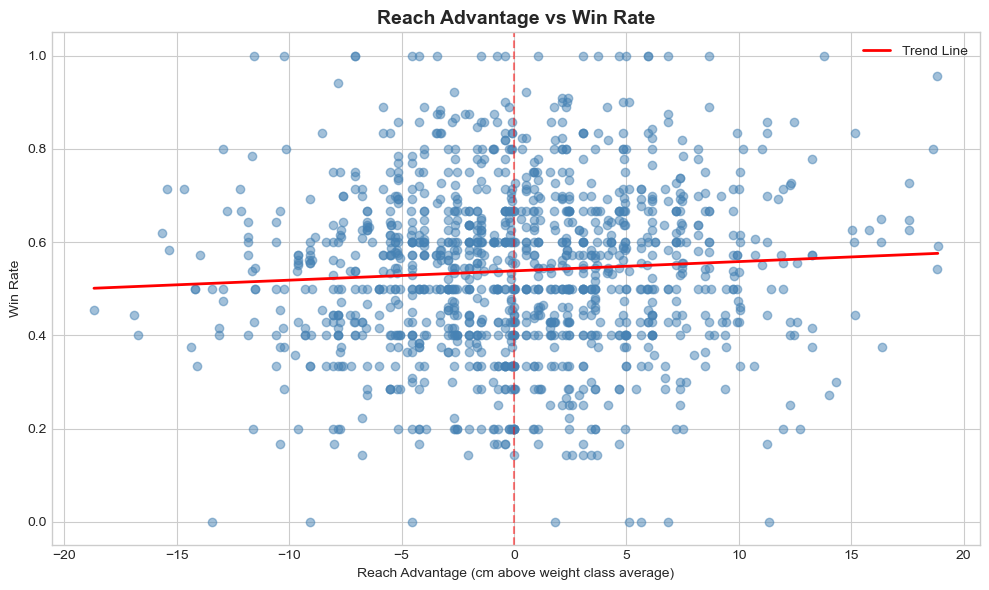

In [38]:
# Reach advantage analysis
# Calculate reach advantage (reach - average reach for weight class)
avg_reach_by_class = combined_df.groupby('weight_class')['reach'].mean()
combined_df['reach_advantage'] = combined_df.apply(
    lambda row: row['reach'] - avg_reach_by_class.get(row['weight_class'], row['reach']) 
    if pd.notna(row['reach']) else np.nan, axis=1
)

# Plot reach advantage vs win rate
filtered_df = combined_df[(combined_df['total_fights'] >= 5) & (combined_df['reach_advantage'].notna())]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['reach_advantage'], filtered_df['win_rate'], alpha=0.5, c='steelblue')
plt.axvline(0, color='red', linestyle='--', alpha=0.5)

# Add trend line
z = np.polyfit(filtered_df['reach_advantage'].dropna(), 
               filtered_df.loc[filtered_df['reach_advantage'].notna(), 'win_rate'].dropna(), 1)
p = np.poly1d(z)
x_line = np.linspace(filtered_df['reach_advantage'].min(), filtered_df['reach_advantage'].max(), 100)
plt.plot(x_line, p(x_line), color='red', linestyle='-', linewidth=2, label='Trend Line')

plt.title('Reach Advantage vs Win Rate', fontsize=14, fontweight='bold')
plt.xlabel('Reach Advantage (cm above weight class average)')
plt.ylabel('Win Rate')
plt.legend()
plt.tight_layout()
plt.show()

## 7. Summary Statistics

In [41]:
# Print summary statistics
print("="*60)
print("UFC DATA SUMMARY")
print("="*60)
print(f"\nFIGHTERS:")
print(f"  Total fighters in database: {len(fighter_attributes):,}")
print(f"  Male fighters: {(fighter_attributes['gender'] == 'male').sum():,}")
print(f"  Female fighters: {(fighter_attributes['gender'] == 'female').sum():,}")
print(f"  Weight classes: {fighter_attributes['weight_class'].nunique()}")
print(f"  Countries represented: {fighter_attributes['country'].nunique()}")
print(f"  Average age: {fighter_attributes['age'].mean():.1f} years")
print(f"  Average height: {fighter_attributes['height'].mean():.1f} cm")
print(f"  Average weight: {fighter_attributes['weight'].mean():.1f} kg")

print(f"\nFIGHT HISTORY:")
print(f"  Total fights recorded: {len(fighter_history):,}")
print(f"  Title fights: {(fighter_history['title_fight'] == True).sum():,}")
print(f"  Most common result type: {fighter_history['fight_result_type'].mode()[0]}")

print(f"\nEVENTS:")
print(f"  Total events: {ufc_events['event_id'].nunique():,}")
print(f"  Venues used: {ufc_events['event_venue'].nunique():,}")
print(f"  Countries hosted: {ufc_events['event_venue_country'].nunique():,}")

print("\n" + "="*60)

UFC DATA SUMMARY

FIGHTERS:
  Total fighters in database: 3,035
  Male fighters: 2,746
  Female fighters: 289
  Weight classes: 15
  Countries represented: 112
  Average age: 37.0 years
  Average height: 178.2 cm
  Average weight: 75.6 kg

FIGHT HISTORY:
  Total fights recorded: 17,837
  Title fights: 959
  Most common result type: DEC-UNA

EVENTS:
  Total events: 859
  Venues used: 229
  Countries hosted: 34

